In [63]:
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

In [64]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [65]:
df=pd.read_csv('norm-song-reduced-features-2.csv', sep=',')
df.head()

,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
0,0.511171,0.073836,0.000000,-0.002119,0.000258,0.031150,0.000775,0.024010,0.001291,0.005938,0.228994,0.000775,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.507572,0.061011,0.001025,-0.001514,0.000000,0.030733,0.001025,0.024097,0.003076,0.008203,0.219691,0.000513,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.530254,0.098552,0.002410,-0.001623,0.000000,0.030962,0.001071,0.023567,0.003214,0.008570,0.229509,0.000536,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0.509095,0.071736,0.000257,-0.002234,0.000257,0.028989,0.001028,0.023912,0.001800,0.002828,0.168927,0.000514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.511150,0.100165,0.002582,-0.003565,0.000000,0.033866,0.001033,0.021283,0.001807,0.002840,0.169609,0.000774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
df.describe()

,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000
mean,0.554862,0.064456,0.001473,-0.002655,0.000209,0.034187,0.001016,0.023174,0.000228,0.000624,0.043884,0.000692,0.010236,0.097366,0.034827,0.000499,0.011859,0.010111,0.008364,0.013981,0.143553,0.030208,0.003495,0.038572,0.062289,0.299838,0.047934,0.004369,0.585819
std,0.029077,0.021514,0.001010,0.001044,0.000123,0.008458,0.000307,0.004842,0.000505,0.001673,0.042336,0.000161,0.100660,0.296474,0.183353,0.022341,0.108257,0.100051,0.091075,0.117418,0.350657,0.171171,0.059020,0.192585,0.241695,0.458215,0.213640,0.065958,0.492611
min,0.202436,0.004594,0.000000,-0.009583,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.000285,0.000210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.547231,0.049933,0.000564,-0.003334,0.000000,0.028053,0.001022,0.022197,0.000000,0.000000,0.011759,0.000569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.564842,0.061554,0.001448,-0.002575,0.000281,0.033523,0.001126,0.023846,0.000000,0.000000,0.030001,0.000587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.572210,0.073602,0.002337,-0.001851,0.000288,0.038841,0.001154,0.025902,0.000285,0.000576,0.060930,0.000856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.576030,0.310343,0.003238,-0.000078,0.000295,0.070957,0.002053,0.031370,0.005484,0.025207,0.250463,0.000883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
array = df.values
X = array[:,0:-1]
y = array[:,-1] #is_top40

validation_size = 0.30
seed = 0
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [68]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_validation.shape))
print("y_test shape: {}".format(y_validation.shape))

X_train shape: (5607, 28)
y_train shape: (5607,)
X_test shape: (2404, 28)
y_test shape: (2404,)


In [69]:
#seed=7
#scoring='accuracy'

In [75]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set {}".format(tree.score(X_train,y_train)))
print("accuracy on test set {}".format(tree.score(X_validation,y_validation)))

accuracy on training set 0.9138576779026217
accuracy on test set 0.9034941763727121


In [76]:
print(tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [77]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["hit", "not a hit]"], feature_names=df.columns[:-1], impurity=False, filled=True)

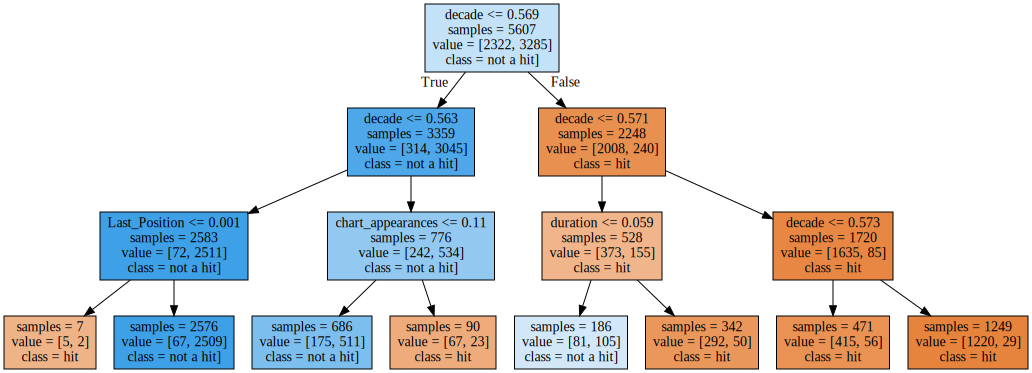

In [78]:
import graphviz
with open("tree.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [74]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.91726981 0.04539861 0.         0.         0.         0.
 0.         0.00971445 0.         0.         0.02668521 0.00093193
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
